# Boosting :
    Regression Models

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('house.csv')
df.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,price
0,1,26.184098,1286.68,204.003817,22,96004.80456
1,1,34.866901,1855.25,186.980360,8,92473.72257


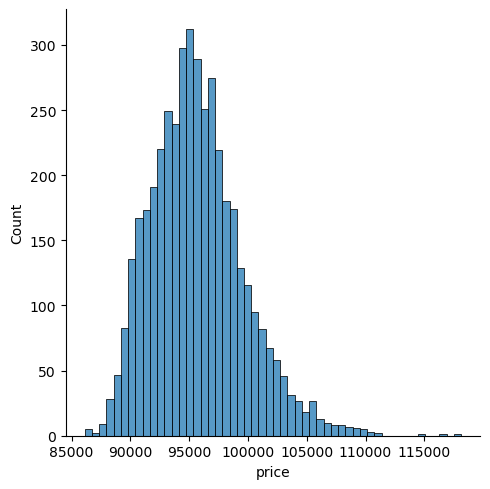

In [3]:
sns.displot(df['price'])

# Assign X & Y

In [4]:
x = df.iloc[:,:-1]
y = df.price

In [5]:
x.shape,y.shape

((4308, 5), (4308,))

In [6]:
x.head(2)

,bedroom_count,net_sqm,center_distance,metro_distance,floor
0,1,26.184098,1286.68,204.003817,22
1,1,34.866901,1855.25,186.980360,8


In [7]:
y

0        96004.80456
1        92473.72257
2        98112.51994
3        92118.32687
4        98976.65318
            ...     
4303    102707.35620
4304     99695.06499
4305     93803.71562
4306     92914.72913
4307     93743.04729
Name: price, Length: 4308, dtype: float64

# Split the data between training & testing

In [9]:
# spliting the data into training and testing

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state = 2)
print('*'*30 + 'Training data' + '*'*30)
print('Training data-X- shape: \t',xtrain.shape)
print()
print('Training data-Y- shape: \t',ytrain.shape)
print()
print('*'*30 + 'Testing data' + '*'*30)
print()
print('Training data-(X-Input)-shape: \t',xtest.shape)
print()
print('Training data-(Y-outcome)-shape: \t',ytest.shape)

******************************Training data******************************
Training data-X- shape: 	 (3446, 5)

Training data-Y- shape: 	 (3446,)

******************************Testing data******************************

Training data-(X-Input)-shape: 	 (862, 5)

Training data-(Y-outcome)-shape: 	 (862,)


# Base Model

# 1. Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

print('*'*75)
print('\n Training Phase')
lin_reg.fit(xtrain,ytrain)
print()
print('HyperParameters:\n',lin_reg.get_params())
print()
print('Training completed\n')
print('*'*75)
print()
print('Testing Phase:')
ypred_lin_reg = lin_reg.predict(xtest)
print()
print('Predicted value is:\n',ypred_lin_reg)
print()
print('Testing completed')
print('*'*75)

#import Metrics
from sklearn.metrics import r2_score,mean_squared_error
print()
print('*'*75)
print('Linear Regression - Performance Measuer')
print('*'*75)

Accuracy_lin_reg = r2_score(ytest,ypred_lin_reg)
Mean_lin_reg = mean_squared_error(ytest,ypred_lin_reg)
SqrtMean_lin_reg = np.sqrt(mean_squared_error(ytest,ypred_lin_reg))

print('Accuracy Score:\t\n',Accuracy_lin_reg)
print('MSE:\t\n',Mean_lin_reg)
print('RMSE:\t\n',SqrtMean_lin_reg)


***************************************************************************

 Training Phase

HyperParameters:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

Training completed

***************************************************************************

Testing Phase:

Predicted value is:
 [ 93696.55382329  94729.58267453  91645.15680776  91509.84922928
  94412.75788696  90611.97183063  97604.14546298  94319.50387644
  91130.04660759  96647.84339503  95454.31573005  98217.5559076
  93157.55131507  94042.70380746  97483.44833347 101231.55726449
  94157.17874251 102216.18437514  96995.56526749  94455.87424427
  96977.42749195  93749.61838669  95426.76982492  99579.97741875
  93287.10979231  92302.14473512  94628.42409895  92233.764925
  94127.80255822  92907.29450669  98219.12170519  95908.85616956
  98630.09704012  98810.58925312  98752.68730984  99996.53109834
 105522.27503002  91675.63275555  96911.64416606  95763.04763573
  98780.92338128  92153.1331339

# 2. KNN Regression

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn_model = KNeighborsRegressor(n_neighbors=3)
print('*'*28 + 'KNN Classifier Model' + '*'*27)
print()
print('Training phasis\n')
knn_model.fit(xtrain,ytrain)
print('Training completed\n')
print('='*75)
print('Testing phase\n')
print()
ypred_knn = knn_model.predict(xtest)
print('Predicted values are :\t\n',ypred_knn)
print('Testing Completed')
print('='*75)

#Performace Measure

Accuracy_KNN = r2_score(ytest,ypred_knn)
Mean_KNN = mean_squared_error(ytest,ypred_knn)
SqrtMean_KNN = np.sqrt(mean_squared_error(ytest,ypred_knn))

print('Accuracy Score:\t\n',Accuracy_KNN)
print('MSE:\t\n',Mean_KNN)
print('RMSE:\t\n',SqrtMean_KNN)


****************************KNN Classifier Model***************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [ 93426.91942333  92870.9291      93489.18729333  91027.15372667
  94066.41664333  91154.21251333  98173.29628333  94481.57917667
  93080.0661      95730.98293     92371.59799333  97904.0775
  91787.58992333  94884.81080333  98724.89685    100789.4626
  91508.03762667 102075.47572     98602.42704333  95032.64501667
  96887.32732     92460.30488     95588.37267333 102425.7464
  91318.94088667  93110.60711667  93954.6401      89408.49241667
  93500.04291667  91087.11151333  97340.22639333  95930.40363333
  98675.83314333  96090.90121667  98407.05901333  96062.24093667
 104884.67273     91193.53284667  95957.92315     97137.81731333
  98265.89233333  91061.51493     95573.16150333  91146.84535333
 103799.63276667  96721.06219333  94935.57150667  98462.60771333
  96404.01175667  93188.30544333  99549.56367     90404.04151
  98262.05672  

# 3. Decision Tree Model

In [13]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor()

print('Decision Tree Model')
print('*'*75)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print()
print('HyperParameters:\n',dt_clf.get_params())
print()
print('Training completed\n')
print('*'*75)
print()
print('Testing Phase:')
ypred_dt = dt_clf.predict(xtest)
print()
print('Predicted value is:\n',ypred_dt)
print()
print('Testing completed')
print('*'*75)

#Performance Error

Accuracy_DT = r2_score(ytest,ypred_dt)
Mean_DT = mean_squared_error(ytest,ypred_dt)
SqrtMean_DT = np.sqrt(mean_squared_error(ytest,ypred_dt))

print('Accuracy Score:\t\n',Accuracy_DT)
print('MSE:\t\n',Mean_DT)
print('RMSE:\t\n',SqrtMean_DT)


Decision Tree Model
***************************************************************************

 Training Phase

HyperParameters:
 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Training completed

***************************************************************************

Testing Phase:

Predicted value is:
 [ 93806.92219  93787.14919  92628.12834  93464.71795  92495.11726
  89285.27341  99005.30178  95940.91426  89538.04381  95319.94571
  97209.77295 100695.8442   91728.48293  91502.9513  102445.7079
 100380.3729   96383.56644 103303.54     97715.26622  96767.6532
  98723.54348  93480.62637  95250.33334  97561.83834  90851.31322
  92453.28078  97158.41476  92372.0665   92617.93609  93850.23767
 100426.7557   97446.36455 100870.276    98756.78639  95296.11162
  94284

# 4. Support Vector Regressor

In [14]:
#SVR with Non Linear kernel -rbf
from sklearn.svm import SVR
support_reg = SVR()
print('*'*75)
print('Hyperparameter:\n',support_reg.get_params())
print('*'*75)

#Train Phase
support_reg.fit(xtrain,ytrain)

#Testing Phase
ypred_svr = support_reg.predict(xtest)
print('Predicted Price:\n',ypred_svr)
print('*'*75)

#Performance measures
Accuracy_SVR = r2_score(ytest,ypred_svr)
Mean_SVR = mean_squared_error(ytest,ypred_svr)
SqrtMean_SVR = np.sqrt(mean_squared_error(ytest,ypred_svr))

print('Accuracy Score:\t\n',Accuracy_SVR)
print('MSE:\t\n',Mean_SVR)
print('RMSE:\t\n',SqrtMean_SVR)


***************************************************************************
Hyperparameter:
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
***************************************************************************
Predicted Price:
 [95246.13079768 95067.22545565 95159.62939292 95075.26217678
 95540.84976833 95041.33204046 95739.14733306 95123.03547735
 95243.10552851 95079.45273755 95084.607658   95352.90373026
 95052.50749411 95088.23610767 95729.46806556 95825.63937375
 95099.33872421 95685.62005592 95351.42522249 95563.57676973
 95807.36193984 95266.40137663 95318.1136712  95703.74257376
 95310.87969486 95054.79198997 95772.7849444  95062.82436193
 95450.48552895 95071.15520846 95088.38868282 95638.70545043
 95519.82489681 95678.79517921 95153.26874722 95821.56226013
 95788.88057104 95122.56471997 95796.62257507 95813.39660327
 95823.35002934 95061.510365

# 5. Boosting Adaboost

In [15]:

from sklearn.ensemble import AdaBoostRegressor
ada= AdaBoostRegressor(base_estimator=lin_reg,n_estimators=15)
print('*'*75)

#Train Phase
ada.fit(xtrain,ytrain)

#Testing Phase
ypred_ada = ada.predict(xtest)
print('Predicted Price:\n',ypred_ada)
print('*'*75)

#Performance measures
Accuracy_ADA = r2_score(ytest,ypred_ada)
Mean_ADA = mean_squared_error(ytest,ypred_ada)
SqrtMean_ADA = np.sqrt(mean_squared_error(ytest,ypred_ada))

print('Accuracy Score:\t\n',Accuracy_ADA)
print('MSE:\t\n',Mean_ADA)
print('RMSE:\t\n',SqrtMean_ADA)


***************************************************************************
Predicted Price:
 [ 94390.61933033  94585.03441063  91037.12370299  92262.45276747
  95020.46067174  92273.3048766   98107.95150596  93178.48431666
  92828.1733883   97351.67075562  96427.87437489  96489.89137831
  93143.36484458  93717.25026638  97132.06971796  99673.93529637
  95831.25431969 102488.52323396  95623.42307376  94181.4743273
  97500.81507174  95255.11689133  96112.60593412  99205.95925065
  95004.42706255  92328.21802688  95115.0288064   92403.05357636
  94905.8108615   92930.73552794  98139.53415549  98270.7751715
  97126.6160262   96313.3348608   96730.71036265  98901.24169274
 103608.66413241  91773.14086068  97508.40482881  95748.50469537
  98426.88313799  93365.01422916  95009.89653791  92294.08983866
  98695.40313778  94446.40036303  95601.71804724  97329.84894642
  96115.75533779  91243.17866654  97895.6168531   93227.67872509
  95873.90858126  92885.70453439  95364.42238952  92687.9945003

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


# 6. Boosting - GradientBoosting

In [16]:

from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor()
print('*'*75)

#Train Phase
gbr.fit(xtrain,ytrain)

#Testing Phase
ypred_gbr = gbr.predict(xtest)
print('Predicted Price:\n',ypred_gbr)
print('*'*75)

#Performance measures
Accuracy_GBR = r2_score(ytest,ypred_gbr)
Mean_GBR = mean_squared_error(ytest,ypred_gbr)
SqrtMean_GBR = np.sqrt(mean_squared_error(ytest,ypred_gbr))

print('Accuracy Score:\t\n',Accuracy_GBR)
print('MSE:\t\n',Mean_GBR)
print('RMSE:\t\n',SqrtMean_GBR)


***************************************************************************
Predicted Price:
 [ 94052.5780833   94425.92979464  92111.48404194  91190.75925716
  94695.61210219  90322.12442656  99116.86722725  94434.54646419
  91585.11947947  96262.6410705   94348.30404792  97971.2962686
  92876.92613249  93840.08943331  98133.96561528 100462.44355221
  93914.27987773 102308.44447689  97468.90691373  94257.58345821
  97122.19533667  93808.43121203  95219.92981581  99601.46151464
  93106.71354243  92935.99871965  94498.93423269  92272.5060041
  94111.71861586  93480.70497958  98765.45924164  96063.68501263
  98879.426902    97871.01055624  98794.97337114  98172.22492805
 106061.86526901  91527.11711222  96836.76403591  95303.46101623
  98864.47921654  91472.11951408  94349.16176367  91951.71768995
 101395.18177896  94347.10835767  95227.84217429  96011.31882656
  97787.54390911  92029.1200547   97932.05357955  90997.6170884
  95590.03851627  91143.33175324  97488.56693929  93389.76074649

# Model with Accuracy Score

In [17]:
scores = [('Linear Regression',Accuracy_lin_reg),
          ('KNN Regression',Accuracy_KNN),
          ('DecisionTree Regression',Accuracy_DT),
          ('SVR',Accuracy_SVR),
          ('Adaboost Regression',Accuracy_ADA),
          ('Gradient Boost Regression',Accuracy_GBR),
          ]

Acc_scores = pd.DataFrame(scores,columns=['Model','Accuracy_Score'])

print(Acc_scores.sort_values(by='Accuracy_Score',ascending=False))

                       Model  Accuracy_Score
0          Linear Regression        0.715308
5  Gradient Boost Regression        0.714316
4        Adaboost Regression        0.602998
1             KNN Regression        0.592495
2    DecisionTree Regression        0.385716
3                        SVR        0.050500


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'DecisionTree Regression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'Adaboost Regression'),
  Text(5, 0, 'Gradient Boost Regression')])

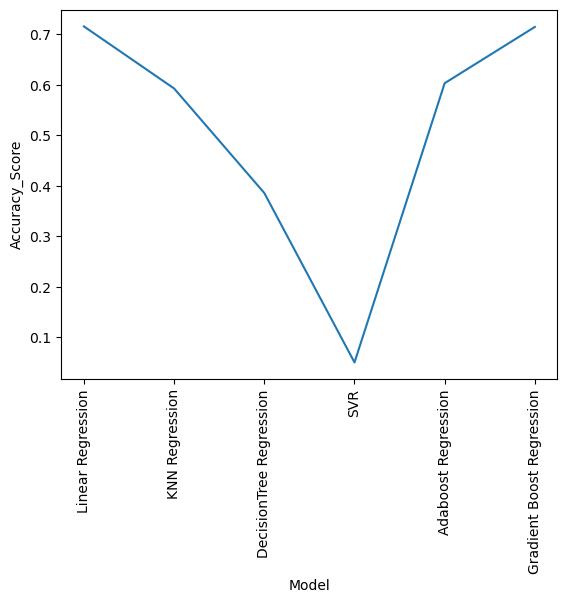

In [18]:
sns.lineplot(x=Acc_scores['Model'],y=Acc_scores['Accuracy_Score'],data = Acc_scores)
plt.xticks(rotation = 90)